In [1]:
import pencil as pc
import numpy as np
import matplotlib.pyplot as plt
import os

$ conda install -c plotly plotly-orca psutil requests


In [2]:
# Define paths
HOME = os.path.expanduser("~")
ROOT = os.path.join(HOME, "programming", "murman", "CME", "5012", "1D")
FIG_DIR = os.path.join(HOME, "figs_cmi")
os.makedirs(FIG_DIR, exist_ok=True)

# Auto-detect subdirectories in ROOT that are simulations
RUNS = sorted([
    name for name in os.listdir(ROOT)
    if os.path.isdir(os.path.join(ROOT, name)) and not name.startswith(".") and not name == "CVS"
])
SIMS = [pc.get_sim(os.path.join(ROOT, r)) for r in RUNS]

# Print for verification
print("Detected runs:", RUNS) 

? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/128a is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/2048_gamma2 is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/2048_gamma2_const is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/2048_gamma3_new_k100 is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/2048_gamma3_new_k100_source9 is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/2048_gamma3_new_source7 is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/programming/murman/CME/5012/1D/4096_gamma2_tphi_1 is not up to date, recreating simulation object..
? Warning: sim.dill in /home/mgurgeni/p

In [3]:
for id,sim in enumerate(SIMS):
    print(f"id, name : {id}, {sim.name}")
    if sim.name == "2048_gamma3_new_k100":
        SIM = sim

id, name : 0, 128a
id, name : 1, 2048_gamma2
id, name : 2, 2048_gamma2_const
id, name : 3, 2048_gamma3_new_k100
id, name : 4, 2048_gamma3_new_k100_source9
id, name : 5, 2048_gamma3_new_source7
id, name : 6, 4096_gamma2_tphi_1
id, name : 7, 4096_gamma2_tphi_1_k100
id, name : 8, 4096_gamma2_tphi_1_k5000
id, name : 9, 4096_gamma3_new
id, name : 10, 4096_gamma3_new_source7
id, name : 11, 4096_gamma3_new_source7_spectras
id, name : 12, 4096_gamma3_old


In [4]:
def compute_vertical_markers(ts, params):
    t_start = ts.t[0] 
    t_finish = ts.t[-1] 
    t_gamma = 1 / params.gammaf5
    t_phi = params.source5_expt2
#    t_cross = (
#        2 ** (2 / 3)
#        * t_phi ** (2 / 3)
#        * t_gamma ** (-2 / 3)
#        * params.source5 ** (-2 / 3)
#        * params.eta ** (-1 / 3)
#    )
    return [
        (t_start, r"$t_{i}$"),
        (t_gamma, r"$\Gamma_{5}^{-1}$"),
#        (t_cross, r"$t_{\rm cross}$"),
        (t_phi, r"$t_\phi$"),
        (t_finish, r"$t_{f}$"),
    ]

def plot_mu5(ts, params, title="", save_path=None):
    t = ts.t
    mu5 = ts.mu5m
    S5 = ts.srce5m / params.gammaf5
    B = ts.brms
    Jbm = ts.jbm

    # Add slope guide lines
    # Example: line with slope 1 (∝ t) and slope 2 (∝ t²)
    x0, x1 = t[10], t[50]    # choose points within your t range
    y0 = 1e3                 # adjust y0 for vertical placement
    y1 = 1e2
    fig, ax = plt.subplots(figsize=(6, 4))
    # slope 1: y ∝ t
    ax.plot([x0, x1], [y0, y0 * (x1/x0)], 'k--', lw=1)

    # slope 2: y ∝ t²
    ax.plot([x0, x1], [y1, y1 * (x1/x0)**2], 'k-.', lw=1)

    # Optional: annotate them
    ax.text(x1*1.1, y0 * (x1/x0), r"$\propto t$", fontsize=9, va="bottom")
    ax.text(x1*1.1, y1 * (x1/x0)**2, r"$\propto t^2$", fontsize=9, va="bottom")


    ax.loglog(t, mu5, "-x", label=r"$\tilde{\mu}_{5} ~~ [l_{*}^{-1}]$")
    ax.loglog(t, S5, "--", label=r"$\tilde{S}_5 / \Gamma_{5} ~~ [l_{*}^{-1}]$")
   # ax.loglog(t, np.abs(10**8 * 10*(-6)*(-Jbm))/params.gammaf5, "--", label=r"$B$")

    for x, label_text in compute_vertical_markers(ts, params):
        ax.axvline(x, color="gray", linestyle="--", lw=0.8)
        ax.text(x * 1.03, ax.get_ylim()[1] / 5, label_text, rotation=90,
                fontsize=9, verticalalignment="top")
    # Change the font size of the x-axis tick labels
    ax.tick_params(axis='x', labelsize=12) 

    # Change the font size of the y-axis tick labels
    ax.tick_params(axis='y', labelsize=12) 

    ax.set_xlabel("conformal time :~~ $t~~ [t_*]$",fontsize =12)
    ax.set_ylabel("chiral chemical potential",fontsize =12)
    ax.set_title(title,fontsize =13)
    ax.legend()
    #ax.grid(alpha=0.3)

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches="tight")
        plt.close()
        plt.show()
    else:
        plt.show()

In [5]:
params = pc.read.param(datadir=SIM.datadir,param2=True)

Read 300 lines.


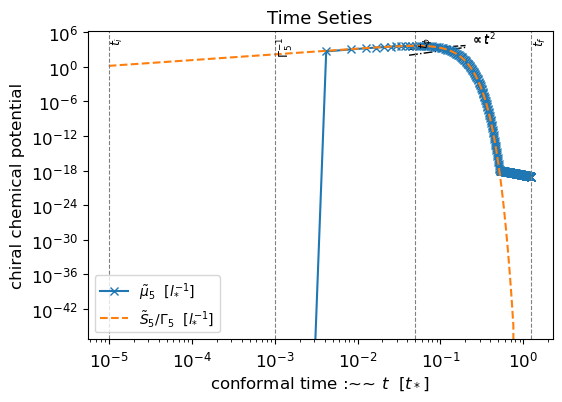

In [6]:
ts = pc.read.ts(datadir=SIM.datadir)
plot_mu5(ts=ts,params=params,title="Time Seties")

In [7]:
def read_timeseries_robust(
    file_name="time_series.dat",
    datadir="data",
    quiet=False,
    comment_char="#",
    sim=None,
    unique_clean=False,
    time_range=None,
    precision="f",
):
    """
    Robust time series reader that handles multiple headers and prevents line skipping.
    
    Key improvements:
    - Better header detection for multiple header lines
    - Flexible column handling
    - Detailed error reporting
    - Maintains data integrity across header boundaries
    """
    
    import numpy as np
    import os.path
    import re

    if precision == "h":
        precision = "half"
    if sim:
        from pencil.sim import __Simulation__
        if isinstance(sim, __Simulation__):
            datadir = sim.datadir

    datadir = os.path.expanduser(datadir)
    
    # Read all lines
    with open(os.path.join(datadir, file_name), "r") as infile:
        lines = infile.readlines()

    # Initialize variables
    keys = []
    data_rows = []
    skipped_lines = []
    line_count = 0
    
    if not quiet:
        print(f"Processing {len(lines)} lines...")

    for i, line in enumerate(lines):
        line_stripped = line.strip()
        
        # Skip empty lines
        if not line_stripped:
            continue
            
        # Detect header lines - multiple patterns for robustness
        is_header = False
        if line_stripped.startswith(comment_char):
            # Check for header patterns:
            # 1. Lines with multiple dashes (like your format)
            # 2. Lines that look like column headers
            if '--' in line_stripped or 'it' in line_stripped[:50]:  # 'it' is your first column
                is_header = True
        
        if is_header:
            # Extract column names from header
            # Remove comment character and clean up
            header_line = line_stripped.lstrip(comment_char).strip('-')
            
            # Split on multiple dashes or whitespace to get column names
            potential_keys = re.split(r'-{2,}|\s{2,}', header_line)
            potential_keys = [key.strip('-').strip() for key in potential_keys if key.strip('-').strip()]
            
            if potential_keys:
                # Update keys if we found valid column names
                if not keys:  # First header
                    keys = potential_keys
                    if not quiet:
                        print(f"Found {len(keys)} columns: {keys[:5]}...")  # Show first 5
                elif len(potential_keys) == len(keys):
                    # Same number of columns, might be a repeated header
                    if not quiet:
                        print(f"Line {i+1}: Repeated header found")
                else:
                    # Different number of columns - this is problematic
                    print(f"Warning: Line {i+1} has {len(potential_keys)} columns, expected {len(keys)}")
                    # You can choose to update keys or keep the original
                    # keys = potential_keys  # Uncomment to update
            continue
        
        # Try to parse as data line
        if not line_stripped.startswith(comment_char):
            # Split the line into values
            values = line_stripped.split()
            
            if not keys:
                print(f"Error: No header found before data at line {i+1}")
                skipped_lines.append(i+1)
                continue
            
            # Validate number of columns
            if len(values) != len(keys):
                print(f"Line {i+1}: Expected {len(keys)} columns, got {len(values)}")
                print(f"Line content: {line_stripped[:100]}...")
                
                # Try to handle the mismatch
                if len(values) < len(keys):
                    # Pad with NaN
                    values.extend(['nan'] * (len(keys) - len(values)))
                    print(f"  -> Padded with {len(keys) - len(values)} NaN values")
                elif len(values) > len(keys):
                    # Truncate
                    values = values[:len(keys)]
                    print(f"  -> Truncated to {len(keys)} values")
            
            # Try to convert to float
            try:
                float_values = []
                for j, val in enumerate(values):
                    try:
                        float_values.append(float(val))
                    except ValueError:
                        print(f"Line {i+1}, column {j+1} ('{keys[j] if j < len(keys) else 'unknown'}'): Cannot convert '{val}' to float")
                        float_values.append(np.nan)
                
                data_rows.append(float_values)
                line_count += 1
                
            except Exception as e:
                print(f"Line {i+1}: Unexpected error - {e}")
                print(f"Line content: {line_stripped}")
                skipped_lines.append(i+1)

    # Convert to numpy array
    if not data_rows:
        raise ValueError("No valid data rows found!")
    
    # Ensure all rows have the same length
    max_cols = max(len(row) for row in data_rows)
    for row in data_rows:
        while len(row) < max_cols:
            row.append(np.nan)
    
    data = np.array(data_rows, dtype=precision)
    
    if not quiet:
        print(f"Successfully parsed {line_count} data lines")
        if skipped_lines:
            print(f"Skipped {len(skipped_lines)} lines: {skipped_lines[:10]}...")  # Show first 10
    
    # Create TimeSeries-like object (simplified)
    class TimeSeriesResult:
        def __init__(self):
            self.keys = keys
            
    result = TimeSeriesResult()
    
    # Assign data to attributes
    for i, key in enumerate(keys):
        if i < data.shape[1]:
            setattr(result, key, data[:, i])
    
    # Handle time range filtering
    if time_range and hasattr(result, 't'):
        if isinstance(time_range, list):
            if len(time_range) == 1:
                start_time, end_time = 0.0, time_range[0]
            else:
                start_time, end_time = time_range[0], time_range[1]
        else:
            start_time, end_time = 0.0, time_range
            
        # Find indices within time range
        mask = (result.t >= start_time) & (result.t <= end_time)
        
        # Apply mask to all attributes
        for key in keys:
            if hasattr(result, key):
                setattr(result, key, getattr(result, key)[mask])
    
    # Handle unique time cleaning
    if unique_clean and hasattr(result, 't'):
        _, unique_indices = np.unique(result.t, return_index=True)
        unique_indices = np.sort(unique_indices)  # Maintain order
        
        if len(unique_indices) != len(result.t):
            print(f"Removing {len(result.t) - len(unique_indices)} duplicate time entries")
            for key in keys:
                if hasattr(result, key):
                    setattr(result, key, getattr(result, key)[unique_indices])
    
    return result


# Usage example:
def test_parser():
    """Test function - replace with your actual file path"""
    try:
        ts = read_timeseries_robust(f"/home/mgurgeni/programming/test/mhd_project/tmp/murman/CME/5012/1D/{SIM.name}/data/time_series.dat", quiet=False)
    
        print(f"\nSuccess! Loaded data with {len(ts.keys)} columns")
        print(f"Available columns: {ts.keys}")
        if hasattr(ts, 't'):
            print(f"Time range: {ts.t[0]:.6f} to {ts.t[-1]:.6f}")
            print(f"Data points: {len(ts.t)}")
        return ts
    except Exception as e:
        print(f"Error: {e}")
        return None

# Uncomment to test:
ts = test_parser()

Processing 303 lines...
Found 17 columns: ['it', 't', 'dt', 'EEK', 'EEM']...
Line 102: Repeated header found
Line 203: Repeated header found
Successfully parsed 300 data lines

Success! Loaded data with 17 columns
Available columns: ['it', 't', 'dt', 'EEK', 'EEM', 'urms', 'brms', 'umax', 'bmax', 'abm', 'jbm', 'ujxbm', 'mu5m', 'mu5rms', 'mu5max', 'rhom', 'srce5m']
Time range: 0.000010 to 1.250838
Data points: 300
